# Introduction - InvestorsEye StockSight

Share prices are volatile & veru difficult to predict with a high degree of accuracy since there are many factors involved i.e. physical vs psychological, rational vs. irrational behaviour of human beings etc.

By looking at features like company announcements, revenue results etc ML can unearth patterns & insights which can increase the accuracy of predictions.

Stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.

- Fundamental Analysis involves analyzing the company’s future profitability on the basis of its current business environment and financial performance.

- Technical Analysis, on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.


# Problem Statement - Stocks prediction using LSTM

Long Short Term Memory (LSTM) for stocks prediction.

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because it is able to store past information that is important, and forget the information that is not.

LSTM has three gates:

- The input gate: The input gate adds information to the cell state
- The forget gate: It removes the information that is no longer required by the model
- The output gate: Output Gate at LSTM selects the information to be shown as output

#Python #MachineLearning #Keras #DeepLearning #TensorFlow #Stocks

DataSet = Quandl - TATA Global Beverages, Microsoft


In [1]:
#import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,5

from matplotlib.lines import Line2D

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from datetime import datetime

vTicker = 'KEGN'


#read datafile
#df = pd.read_csv('data/NSE_KPLC_KenyaPower.csv')
df = pd.read_csv('data/NSE_KEGN_Kengen.csv')

#print the head
print(vTicker)
df.head()

Using TensorFlow backend.


KEGN


,Date,Open,High,Low,Close,Vol.,Change %
0,08-05-2012,8.65,8.90,8.50,8.75,186.70K,1.16%
1,09-05-2012,8.75,8.70,8.50,8.55,94.90K,-2.29%
2,10-05-2012,8.55,8.75,8.45,8.60,76.80K,0.58%
3,11-05-2012,8.60,8.85,8.15,8.60,141.80K,0.00%
4,14-05-2012,8.60,8.80,8.60,8.65,91.70K,0.58%


Variables – date, open, high, low, last, close, total_trade_quantity, and turnover.
Market is closed on weekends and public holidays.

Daily Closing price is the target variable to be predicted.


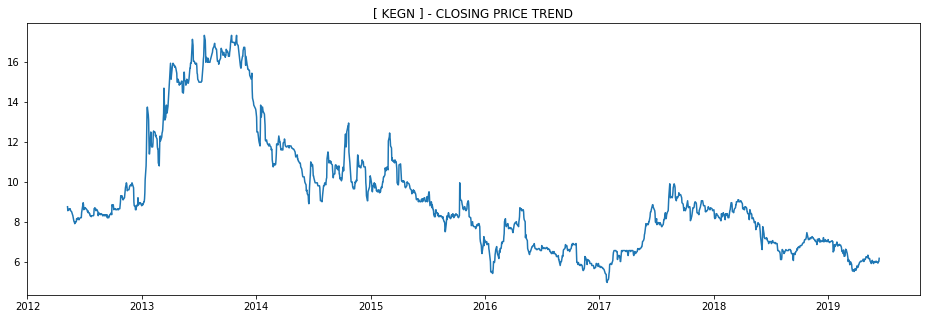

In [2]:
#Format date to yyyymmdd and index data by date

df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

#plot
plt.plot(df['Close'])
plt.title('[ ' + vTicker + ' ] - CLOSING PRICE TREND')
plt.show()

# Prediction Model - Long Short Term Memory (LSTM)

Create new dataFrame with only Date & Close price then then split it into training & validation sets to verify predictions.

In [3]:
#Create new dataFrame with Date & Close price

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

new_data.head()

,Date,Close
0,2012-05-08 00:00:00,8.75
1,2012-05-09 00:00:00,8.55
2,2012-05-10 00:00:00,8.6
3,2012-05-11 00:00:00,8.6
4,2012-05-14 00:00:00,8.65


 Validation/control dataset = previous year’s data and Training dataset = next previous 4 years’ data before previous year.
 
 NOTE: Random splitting will destroy the date/time component.

In [4]:
#Splitting training & validation datasets

#set date index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

#Split data for training - 80% and Validation 20%
vCount = round(len(dataset)*0.8)
#print(vCount)

train = dataset[0:vCount,:]
valid = dataset[vCount:,:]

dataset.shape, train.shape, valid.shape

#for i in range(5):
#    print(train[i])



((1776, 1), (1421, 1), (355, 1))

In [5]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Use previous 60 days data to predict
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=2, batch_size=2, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Instructions for updating:
Use tf.cast instead.
Epoch 1/2
 - 23s - loss: 0.0034
Epoch 2/2
 - 21s - loss: 0.0015


In [6]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.2390233086994984

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


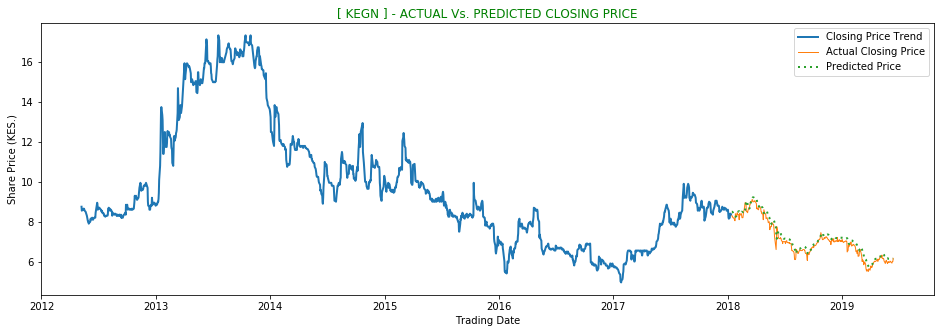

In [7]:
#for plotting
train = new_data[:vCount]
valid = new_data[vCount:]

valid['Predictions'] = closing_price
plt.plot(train['Close'], label='Closing Price Trend', lw=2)

#plt.plot(valid[['Close','Predictions']], dashes=[3, 2], label='Actual Vs. Predicted Closing Price', lw=2)
plt.plot(valid['Close'], label='Actual Closing Price', lw=1)
plt.plot(valid['Predictions'], dashes=[1, 2], label='Predicted Price', lw=2)

plt.title('[ ' + vTicker + ' ] - ACTUAL Vs. PREDICTED CLOSING PRICE').set_color('green')
plt.ylabel('Share Price (KES.)')
plt.xlabel('Trading Date')

plt.legend()
plt.show()


# Inference

- LSTM model can be tuned for various parameters such as changing the number of LSTM layers, adding dropout value or increasing the number of epochs.

## Stock prices are affected by the news about the company and other factors like demonetization or merger/demerger of the companies. There are certain intangible factors as well which can often be impossible to predict beforehand.
